# Data Analysis and Feature Selection Project

This notebook demonstrates various data analysis, visualization, and feature selection techniques using Python.

## Table of Contents
1. Data Preprocessing
2. Exploratory Data Analysis
3. Statistical Analysis
4. Feature Selection Methods
5. Model Building and Evaluation

## 1. Setup and Data Loading
First, let's import the required libraries and load our datasets.

In [7]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


### Loading and Merging Datasets
We'll load two datasets:
1. Food Preferences dataset
2. Indian Food dataset

These datasets will be merged to create our main analysis dataset.

In [8]:
# Load datasets
df1 = pd.read_csv("D:\\PDS\\Food_Preference.csv")
df2 = pd.read_csv("D:\\PDS\\indian_food.csv")

# Merge datasets
merged_df = pd.merge(df1, df2, how='outer', left_on='Food', right_on='name')
print("Merged Dataset Preview:")
merged_df.head()

Merged Dataset Preview:


,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10.0,20.0,spicy,main course,Punjab,North
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5.0,40.0,spicy,main course,Punjab,North
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10.0,40.0,bitter,main course,Punjab,North
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10.0,40.0,spicy,main course,Punjab,North


## 2. Exploratory Data Analysis

Let's explore our dataset through various visualizations and statistical summaries.

In [9]:
# Basic dataset information
print("Dataset Info:")
merged_df.info()

print("\nNumerical Summary:")
print(merged_df.describe())

print("\nMissing Values:")
print(merged_df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       288 non-null    object 
 1   Participant_ID  288 non-null    object 
 2   Gender          284 non-null    object 
 3   Nationality     288 non-null    object 
 4   Age             288 non-null    float64
 5   Food            288 non-null    object 
 6   Juice           288 non-null    object 
 7   Dessert         288 non-null    object 
 8   name            255 non-null    object 
 9   ingredients     255 non-null    object 
 10  diet            255 non-null    object 
 11  prep_time       255 non-null    float64
 12  cook_time       255 non-null    float64
 13  flavor_profile  255 non-null    object 
 14  course          255 non-null    object 
 15  state           255 non-null    object 
 16  region          254 non-null    object 
dtypes: float64(3), object

### Data Visualization

We'll create various plots to understand our data better:

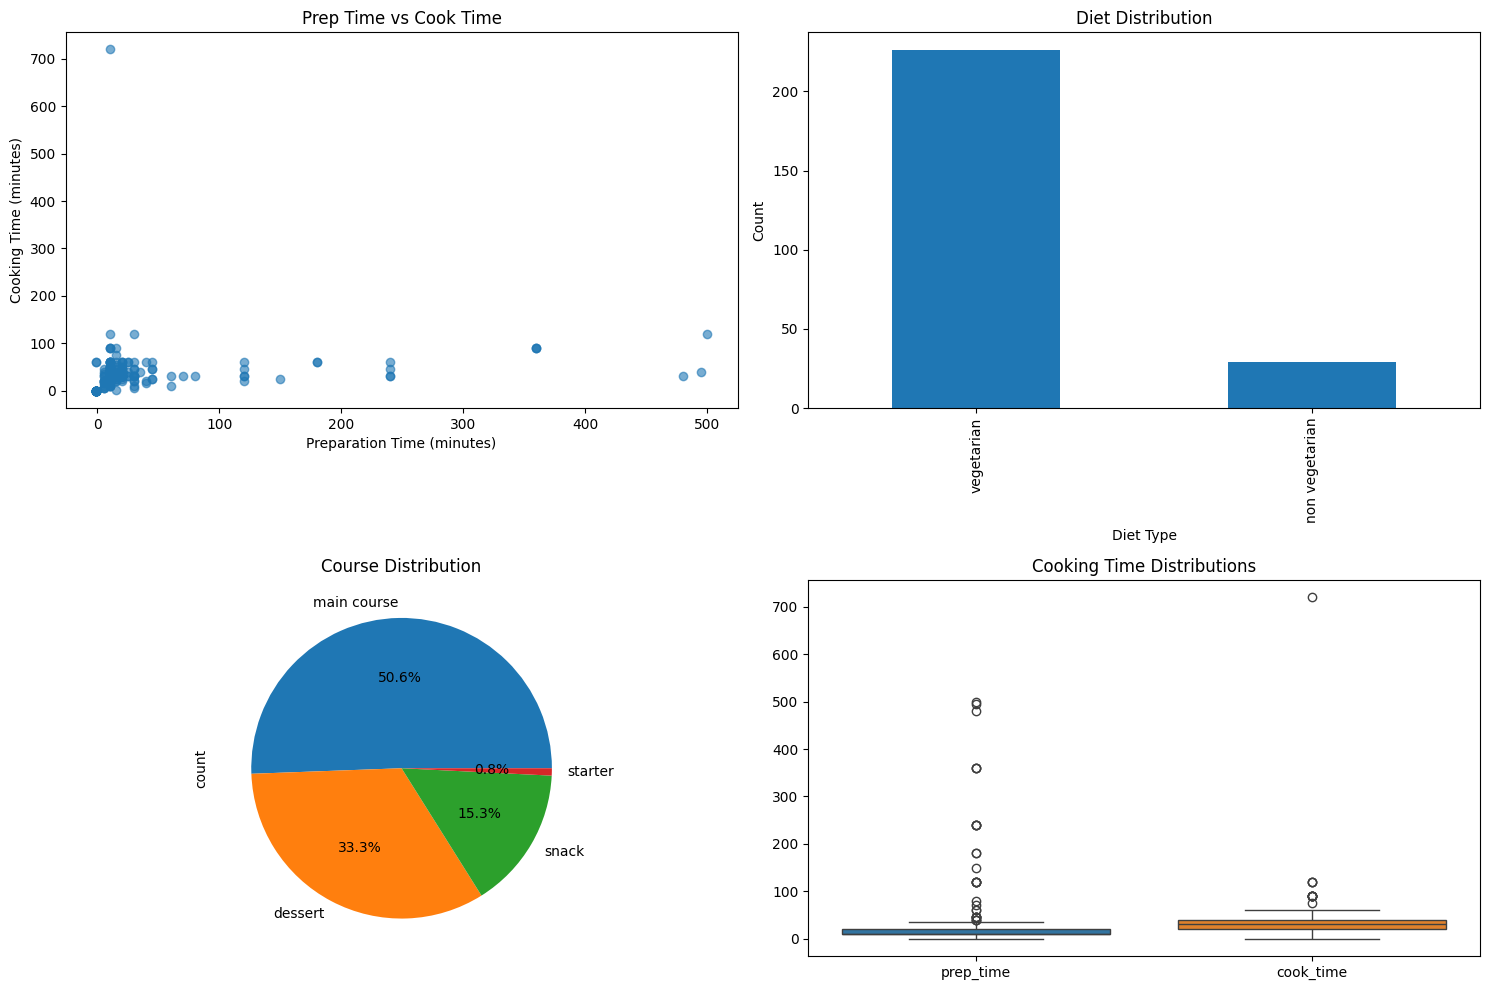

In [10]:
# Create a figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. Scatter plot of prep time vs cook time
plt.subplot(2, 2, 1)
plt.scatter(merged_df['prep_time'], merged_df['cook_time'], alpha=0.6)
plt.title('Prep Time vs Cook Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cooking Time (minutes)')

# 2. Diet distribution
plt.subplot(2, 2, 2)
merged_df['diet'].value_counts().plot(kind='bar')
plt.title('Diet Distribution')
plt.xlabel('Diet Type')
plt.ylabel('Count')

# 3. Course distribution
plt.subplot(2, 2, 3)
merged_df['course'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Course Distribution')

# 4. Box plot of cooking times
plt.subplot(2, 2, 4)
sns.boxplot(data=merged_df[['prep_time', 'cook_time']])
plt.title('Cooking Time Distributions')

plt.tight_layout()
plt.show()

## 3. Statistical Analysis

### Handling Missing Data
We'll handle missing data by either dropping rows with missing values or filling them with column means.

In [11]:
# Data cleaning and preprocessing
# Handle missing values with a single approach
df_cleaned = merged_df.copy()

# For numeric columns, fill with median
numeric_cols = ['prep_time', 'cook_time', 'Age']
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# For categorical columns, fill with mode
categorical_cols = ['diet', 'flavor_profile', 'course', 'state', 'region']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Drop rows where essential columns are still null
df_cleaned = df_cleaned.dropna(subset=['name', 'ingredients'])

print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())


Missing Values After Cleaning:
Timestamp         255
Participant_ID    255
Gender            255
Nationality       255
Age                 0
Food              255
Juice             255
Dessert           255
name                0
ingredients         0
diet                0
prep_time           0
cook_time           0
flavor_profile      0
course              0
state               0
region              0
dtype: int64


### Value Counts
We'll analyze the distribution of values in the 'diet' column.

In [12]:
# Value counts for a specific column ('diet' as an example)
print("\nValue Counts for 'diet':")
print(merged_df['diet'].value_counts())


Value Counts for 'diet':
diet
vegetarian        226
non vegetarian     29
Name: count, dtype: int64


### Checking for Duplicates
We'll check for and handle any duplicate rows in the dataset.

In [13]:
# Checking for Duplicates
print("\nNumber of Duplicated Rows:")
print(merged_df.duplicated().sum())


Number of Duplicated Rows:
0


### Skewness Analysis
We'll calculate the skewness of numeric columns to understand the distribution of data.


Skewness of Numeric Columns:
prep_time     4.636301
cook_time    11.433430
dtype: float64


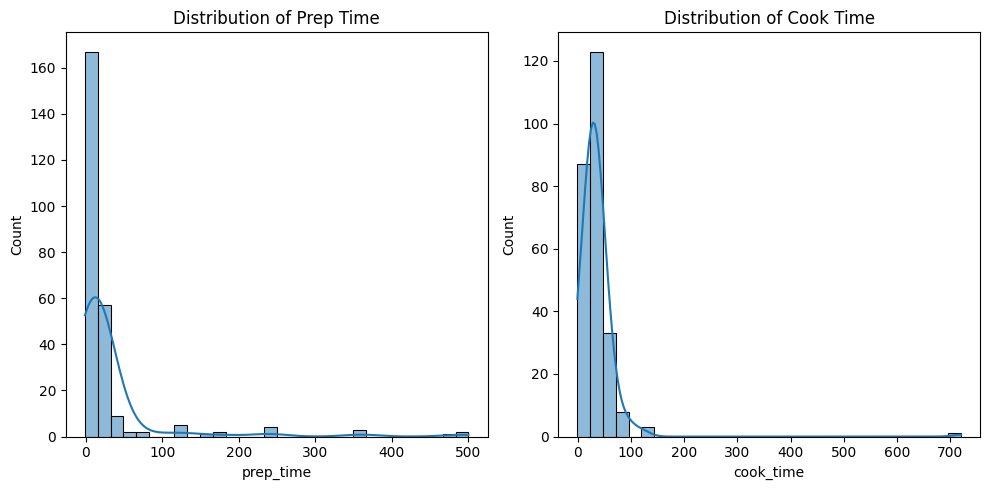

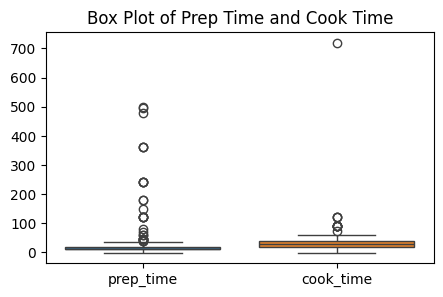

In [14]:
# Skewness
print("\nSkewness of Numeric Columns:")
print(merged_df[['prep_time', 'cook_time']].skew())

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(merged_df['prep_time'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Prep Time')

sns.histplot(merged_df['cook_time'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cook Time')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3))
sns.boxplot(data=merged_df[['prep_time', 'cook_time']])
plt.title("Box Plot of Prep Time and Cook Time")
plt.show()

### Detecting Outliers using IQR
We'll detect outliers using the Interquartile Range (IQR) method.


IQR:
prep_time    10.0
cook_time    20.0
dtype: float64

Lower Bound for Outliers:
prep_time    -5.0
cook_time   -10.0
dtype: float64

Upper Bound for Outliers:
prep_time    35.0
cook_time    70.0
dtype: float64


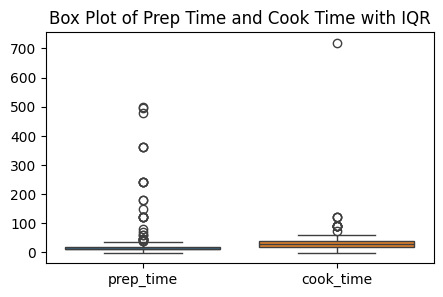

In [15]:
Q1 = merged_df[['prep_time', 'cook_time']].quantile(0.25)
Q3 = merged_df[['prep_time', 'cook_time']].quantile(0.75)
IQR = Q3 - Q1

LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print("\nIQR:")
print(IQR)
print("\nLower Bound for Outliers:")
print(LB)
print("\nUpper Bound for Outliers:")
print(UB)

plt.figure(figsize=(5,3))
sns.boxplot(data=merged_df[['prep_time', 'cook_time']])
plt.title("Box Plot of Prep Time and Cook Time with IQR")
plt.show()

### Filtering Outliers
We'll filter out the detected outliers from the dataset.


Number of Outliers:
38


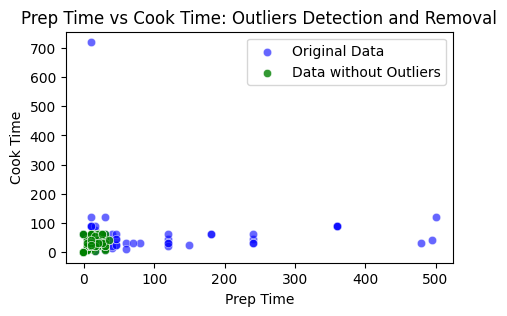

In [16]:
outliers = ((merged_df[['prep_time', 'cook_time']] < (Q1 - 1.5 * IQR)) | (merged_df[['prep_time', 'cook_time']] > (Q3 + 1.5 * IQR))).any(axis=1)

print("\nNumber of Outliers:")
print(outliers.sum())

df_no_outliers = merged_df[~outliers]

plt.figure(figsize=(5, 3))

sns.scatterplot(x=merged_df['prep_time'], y=merged_df['cook_time'], label='Original Data', color='blue', alpha=0.6)

sns.scatterplot(x=df_no_outliers['prep_time'], y=df_no_outliers['cook_time'], label='Data without Outliers', color='green', alpha=0.8)

plt.title("Prep Time vs Cook Time: Outliers Detection and Removal")
plt.xlabel("Prep Time")
plt.ylabel("Cook Time")
plt.legend()
plt.show()

### Z-score Normalization
We'll normalize the numeric columns using Z-score normalization.


First 5 Rows of Normalized Data:
  Timestamp Participant_ID Gender Nationality  Age Food Juice Dessert  \
0       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   
1       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   
2       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   
3       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   
4       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN   

                name                                        ingredients  \
0          Adhirasam   Rice flour, jaggery, ghee, vegetable oil, elachi   
1          Aloo gobi  Cauliflower, potato, garam masala, turmeric, c...   
2         Aloo matar  Potato, peas, chillies, ginger, garam masala, ...   
3         Aloo methi      Potato, fenugreek leaves, chillies, salt, oil   
4  Aloo shimla mirch  Potato, shimla mirch, garam masala, amchur pow...   

         diet  prep_time  cook_time flavor_profile       course        state

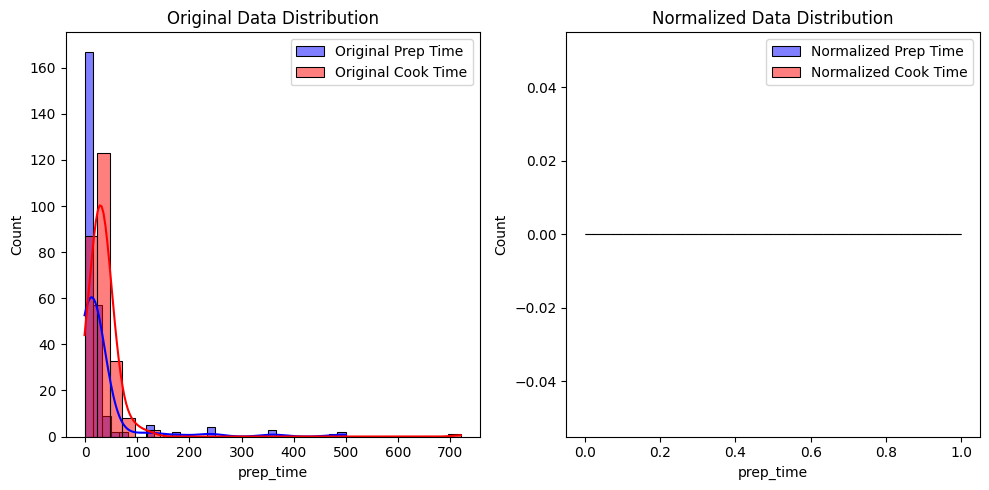

In [17]:
df_normalized = merged_df.copy()
columns_to_normalize = ['prep_time', 'cook_time']
df_normalized[columns_to_normalize] = merged_df[columns_to_normalize].apply(zscore)

print("\nFirst 5 Rows of Normalized Data:")
print(df_normalized.head())

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(merged_df['prep_time'], kde=True, color='blue', label='Original Prep Time', bins=30)
sns.histplot(merged_df['cook_time'], kde=True, color='red', label='Original Cook Time', bins=30)
plt.title("Original Data Distribution")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_normalized['prep_time'], kde=True, color='blue', label='Normalized Prep Time', bins=30)
sns.histplot(df_normalized['cook_time'], kde=True, color='red', label='Normalized Cook Time', bins=30)
plt.title("Normalized Data Distribution")
plt.legend()

plt.tight_layout()
plt.show()

### Label Encoding
We'll convert categorical data into numerical data using label encoding.

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_normalized['diet'] = label_encoder.fit_transform(df_normalized['diet'])
df_normalized['course'] = label_encoder.fit_transform(df_normalized['course'])
df_normalized['flavor_profile'] = label_encoder.fit_transform(df_normalized['flavor_profile'])
df_normalized['state'] = label_encoder.fit_transform(df_normalized['state'])
df_normalized['region'] = label_encoder.fit_transform(df_normalized['region'])
df_normalized['name'] = label_encoder.fit_transform(df_normalized['name'])
df_normalized['ingredients'] = label_encoder.fit_transform(df_normalized['ingredients'])

df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       288 non-null    object 
 1   Participant_ID  288 non-null    object 
 2   Gender          284 non-null    object 
 3   Nationality     288 non-null    object 
 4   Age             288 non-null    float64
 5   Food            288 non-null    object 
 6   Juice           288 non-null    object 
 7   Dessert         288 non-null    object 
 8   name            543 non-null    int64  
 9   ingredients     543 non-null    int64  
 10  diet            543 non-null    int64  
 11  prep_time       0 non-null      float64
 12  cook_time       0 non-null      float64
 13  flavor_profile  543 non-null    int64  
 14  course          543 non-null    int64  
 15  state           543 non-null    int64  
 16  region          543 non-null    int64  
dtypes: float64(3), int64(7), object(7)


### Train-Test Split
We'll split the dataset into training and testing sets.

Training Data Shape:
X_train: (434, 16)
Y_train: (434,)

Testing Data Shape:
X_test: (109, 16)
Y_test: (109,)


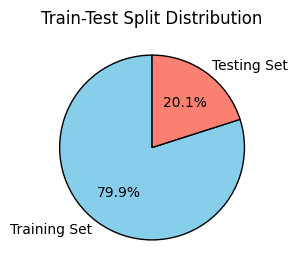

In [19]:
from sklearn.model_selection import train_test_split

x= df_normalized.drop(columns=['diet'])
y= df_normalized['diet']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data Shape:")
print("X_train:", x_train.shape)
print("Y_train:", y_train.shape)
print("\nTesting Data Shape:")
print("X_test:", x_test.shape)
print("Y_test:", y_test.shape)

sizes = [len(y_train), len(y_test)]
labels = ['Training Set', 'Testing Set']
colors = ['skyblue', 'salmon']

plt.figure(figsize=(5,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Train-Test Split Distribution')
plt.show()

### Min-Max Scaling
We'll scale the numeric columns using Min-Max scaling.


First 5 Rows of Min-Max Scaled Data:
  Timestamp Participant_ID Gender Nationality  Age Food Juice Dessert  name  \
0       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN     0   
1       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN     1   
2       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN     2   
3       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN     3   
4       NaN            NaN    NaN         NaN  NaN  NaN   NaN     NaN     4   

   ingredients  diet  prep_time  cook_time  flavor_profile  course  state  \
0          178     1        NaN        NaN               4       0     24   
1           37     1        NaN        NaN               3       1     17   
2          157     1        NaN        NaN               3       1     17   
3          156     1        NaN        NaN               1       1     17   
4          158     1        NaN        NaN               3       1     17   

   region  
0       2  


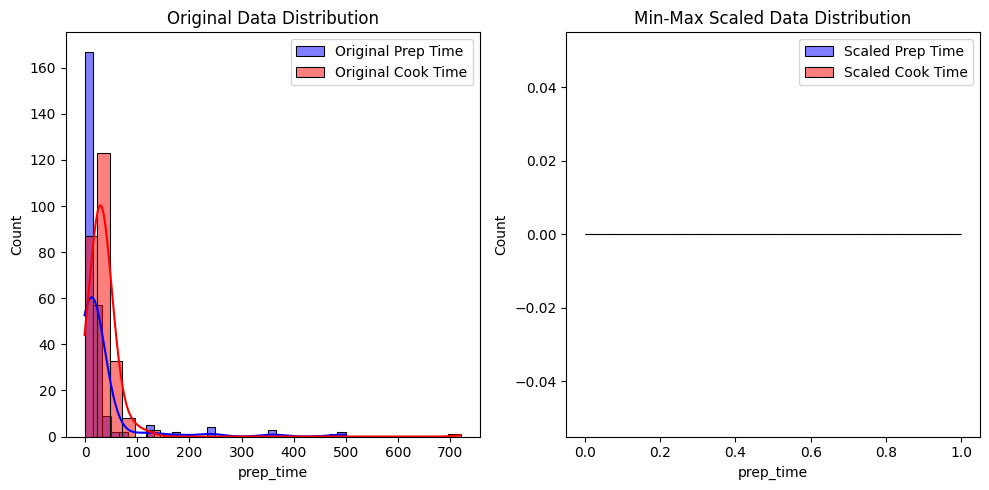

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Copy the normalized dataframe
df_min_max_scaled = df_normalized.copy()

# Columns to scale
columns_to_scale = ['prep_time', 'cook_time']

# Apply MinMax scaling
df_min_max_scaled[columns_to_scale] = scaler.fit_transform(df_normalized[columns_to_scale])

print("\nFirst 5 Rows of Min-Max Scaled Data:")
print(df_min_max_scaled.head())

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(merged_df['prep_time'], kde=True, color='blue', label='Original Prep Time', bins=30)
sns.histplot(merged_df['cook_time'], kde=True, color='red', label='Original Cook Time', bins=30)
plt.title("Original Data Distribution")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(df_min_max_scaled['prep_time'], kde=True, color='blue', label='Scaled Prep Time', bins=30)
sns.histplot(df_min_max_scaled['cook_time'], kde=True, color='red', label='Scaled Cook Time', bins=30)
plt.title("Min-Max Scaled Data Distribution")
plt.legend()

plt.tight_layout()
plt.show()

## 4. Feature Selection Methods

### ANOVA (Analysis of Variance)
We'll use ANOVA to select features that have a significant impact on the target variable.

ANOVA Feature Selection Results:
          Feature  ANOVA F-test Score
3          course         2404.749472
1     ingredients          396.677538
4           state          361.824820
0            name          354.706810
2  flavor_profile          331.927692
5          region          307.298985


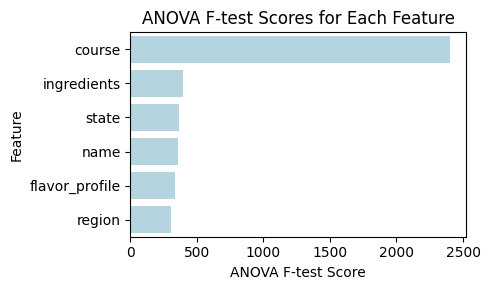

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Using the existing valid features that have already been defined
valid_features = ['name', 'ingredients', 'flavor_profile', 'course', 'state', 'region']
X_filtered = x_train[valid_features]

# Apply SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_filtered, y_train)

# Create a DataFrame with ANOVA scores
anova_df = pd.DataFrame({
    'Feature': valid_features,
    'ANOVA F-test Score': selector.scores_
}).sort_values(by='ANOVA F-test Score', ascending=False)

print("ANOVA Feature Selection Results:")
print(anova_df)

# Visualization
plt.figure(figsize=(5, 3))
sns.barplot(x='ANOVA F-test Score', y='Feature', data=anova_df, color='lightblue')
plt.title('ANOVA F-test Scores for Each Feature')
plt.tight_layout()
plt.show()


### Chi-Square Test for Independence
We'll use the Chi-Square test to determine if there is a significant association between two categorical variables.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'diet' and 'course'
contingency_table = pd.crosstab(merged_df['diet'], merged_df['course'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Test Statistic: 43.18917614664576
P-value: 2.2435961169551635e-09
Degrees of Freedom: 3
Expected Frequencies Table:
[[  9.66666667  14.67058824   4.43529412   0.22745098]
 [ 75.33333333 114.32941176  34.56470588   1.77254902]]


### Visualizing Chi-Square Test Results
We'll visualize the contingency table and the expected frequencies table.

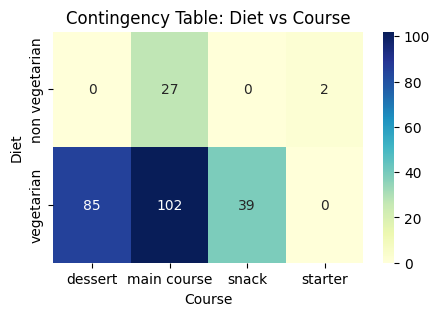

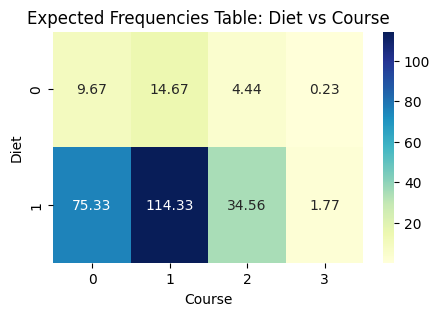

In [ ]:
# Visualize the contingency table
plt.figure(figsize=(5, 3))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Contingency Table: Diet vs Course')
plt.xlabel('Course')
plt.ylabel('Diet')
plt.show()

# Visualize the expected frequencies table
plt.figure(figsize=(5, 3))
sns.heatmap(expected, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Expected Frequencies Table: Diet vs Course')
plt.xlabel('Course')
plt.ylabel('Diet')
plt.show()

### Correlation Matrix
We'll calculate and visualize the correlation matrix for numeric columns.

Pearson's correlation coefficient:
           prep_time  cook_time
prep_time   1.000000   0.144113
cook_time   0.144113   1.000000


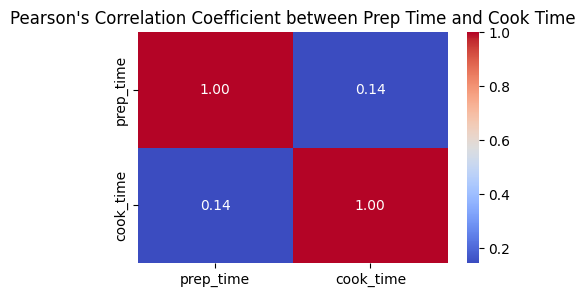

In [ ]:
# Calculate Pearson's correlation coefficient between 'prep_time' and 'cook_time'
pearson_corr = merged_df[['prep_time', 'cook_time']].corr(method='pearson')

print("Pearson's correlation coefficient:")
print(pearson_corr)

plt.figure(figsize=(5, 3))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson's Correlation Coefficient between Prep Time and Cook Time")
plt.show()

### Information Gain
We'll calculate the information gain for each feature.

Mutual Information Scores:
          Feature  Mutual Information
3          course            0.721587
4           state            0.707512
2  flavor_profile            0.707101
1     ingredients            0.700532
5          region            0.696883
0            name            0.691275


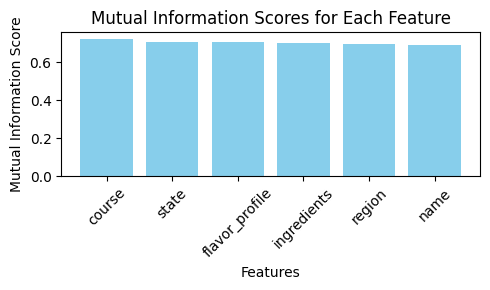

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Filter out non-numeric columns and NaN values from X_filtered
numeric_features = ['name', 'ingredients', 'flavor_profile', 'course', 'state', 'region']
X_filtered_numeric = x_train[numeric_features]

# Calculate mutual information scores
mutual_info_scores = mutual_info_classif(X_filtered_numeric, y_train)

# Create a DataFrame with feature names and their mutual information scores
info_gain_df = pd.DataFrame({
    'Feature': numeric_features,
    'Mutual Information': mutual_info_scores
}).sort_values('Mutual Information', ascending=False)

print("Mutual Information Scores:")
print(info_gain_df)

# Visualize the mutual information scores
plt.figure(figsize=(5, 3))
plt.bar(info_gain_df['Feature'], info_gain_df['Mutual Information'], color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores for Each Feature')
plt.tight_layout()
plt.show()

## 5. Model Building and Evaluation

### Random Forest Classifier
We'll build and evaluate a Random Forest classifier.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select top features based on ANOVA scores
selected_features = ['course', 'ingredients', 'state', 'name', 'flavor_profile', 'region']

# Train Random Forest model with selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train[selected_features], y_train)

# Predictions using selected features
y_pred = rf_model.predict(x_test[selected_features])

# Evaluation
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Performance:
Accuracy: 0.9357798165137615

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.88      1.00      0.93        49
           2       1.00      1.00      1.00        51

    accuracy                           0.94       109
   macro avg       0.96      0.74      0.77       109
weighted avg       0.94      0.94      0.92       109



### Confusion Matrix
We'll visualize the confusion matrix for the Random Forest classifier.

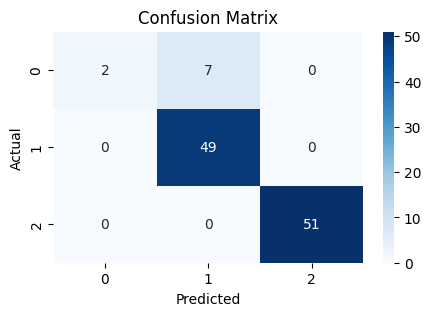

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Forward and Backward Wrapper Methods
We'll use wrapper methods for feature selection.

Selected Features: ['ingredients', 'flavor_profile', 'course', 'state', 'region']

Model Performance with Selected Features:
Accuracy: 0.944954128440367


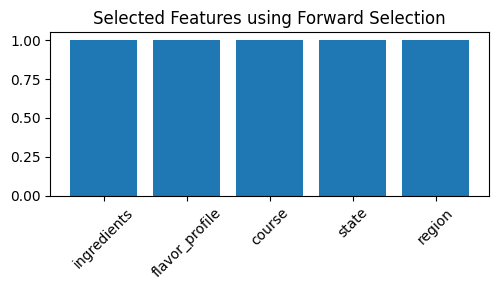

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Sequential Forward Selection
sfs = SequentialFeatureSelector(
    rf_model,
    n_features_to_select=5,  # Select top 5 features
    direction='forward',
    scoring='accuracy'
)

# Select features using forward selection
# Using only numeric features to avoid errors
valid_features = ['name', 'ingredients', 'flavor_profile', 'course', 'state', 'region']
X_filtered = x_train[valid_features]

# Fit the selector
sfs.fit(X_filtered, y_train)

# Get selected feature mask and names
selected_features_mask = sfs.get_support()
selected_features = [feature for feature, selected in zip(valid_features, selected_features_mask) if selected]

print("Selected Features:", selected_features)

# Transform the data using selected features
X_train_selected = sfs.transform(X_filtered)
X_test_selected = sfs.transform(x_test[valid_features])

# Train and evaluate model with selected features
rf_model.fit(X_train_selected, y_train)
y_pred = rf_model.predict(X_test_selected)

print("\nModel Performance with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize feature selection
plt.figure(figsize=(5, 3))
plt.bar(range(len(selected_features)), [1]*len(selected_features), tick_label=selected_features)
plt.xticks(rotation=45)
plt.title('Selected Features using Forward Selection')
plt.tight_layout()
plt.show()

### Recursive Feature Elimination (RFE)
We'll use RFE for feature selection.

Feature Rankings:
          Feature  Selected  Ranking
0            name      True        1
1     ingredients      True        1
3          course      True        1
4           state      True        1
5          region      True        1
2  flavor_profile     False        2


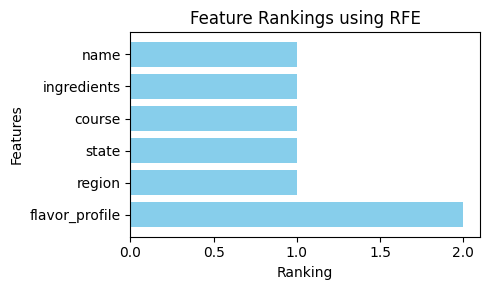

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Use only valid numeric features
valid_features = ['name', 'ingredients', 'flavor_profile', 'course', 'state', 'region']
X_filtered = x_train[valid_features]

# Initialize RFE with the RandomForest model
rfe = RFE(estimator=rf_model, n_features_to_select=5, step=1)

# Fit RFE
rfe.fit(X_filtered, y_train)

# Get selected features and their rankings
feature_ranking_df = pd.DataFrame({
    'Feature': valid_features,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

print("Feature Rankings:")
print(feature_ranking_df)

# Plot the feature rankings
plt.figure(figsize=(5, 3))
plt.barh(feature_ranking_df['Feature'], feature_ranking_df['Ranking'], color='skyblue')
plt.xlabel('Ranking')
plt.ylabel('Features')
plt.title('Feature Rankings using RFE')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### RFE Cross-Validation (RFECV)
We'll use RFECV for feature selection.

Optimal number of features: 5

Selected features: ['name' 'ingredients' 'course' 'state' 'region']


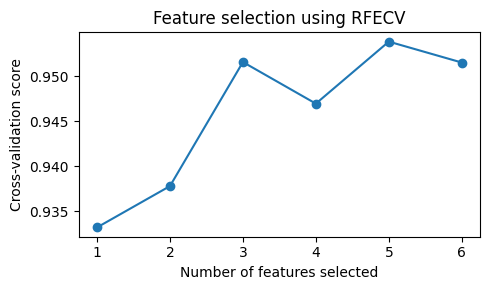


Feature Rankings:
          Feature  Selected  Ranking
0            name      True        1
1     ingredients      True        1
3          course      True        1
4           state      True        1
5          region      True        1
2  flavor_profile     False        2


In [24]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier if not already initialized
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFECV with the RandomForest model and cross-validation strategy
rfecv = RFECV(
    estimator=rf_model,
    step=1,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    min_features_to_select=1
)

# Use valid_features that are already defined and ensure x_train exists
valid_features = ['name', 'ingredients', 'flavor_profile', 'course', 'state', 'region']
X_filtered = x_train[valid_features]

# Fit RFECV
rfecv.fit(X_filtered, y_train)

# Get selected features and create visualization
print("Optimal number of features:", rfecv.n_features_)
print("\nSelected features:", np.array(valid_features)[rfecv.support_])

# Plot cross-validation scores
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
         rfecv.cv_results_['mean_test_score'], 
         marker='o')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.title("Feature selection using RFECV")
plt.tight_layout()
plt.show()

# Create feature ranking visualization
feature_importance = pd.DataFrame({
    'Feature': valid_features,
    'Selected': rfecv.support_,
    'Ranking': rfecv.ranking_
})
print("\nFeature Rankings:")
print(feature_importance.sort_values('Ranking'))


### Embedded Methods
We'll use embedded methods for feature selection.

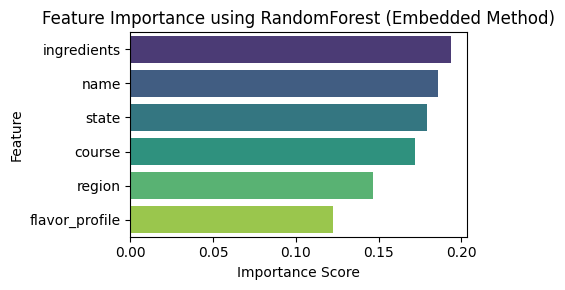


Feature Importances:
          Feature  Importance
1     ingredients    0.193899
0            name    0.185997
4           state    0.179284
3          course    0.171789
5          region    0.146553
2  flavor_profile    0.122479


In [28]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Initialize the RandomForest classifier with specific parameters
rf_model_embedded = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Use the valid features that are already identified
valid_features = ['name', 'ingredients', 'flavor_profile', 'course', 'state', 'region']
X_filtered = x_train[valid_features]

# Fit the model
rf_model_embedded.fit(X_filtered, y_train)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': valid_features,
    'Importance': rf_model_embedded.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(5, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance using RandomForest (Embedded Method)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Print feature importances
print("\nFeature Importances:")
print(feature_importance)


### Ensemble Learning
We'll use ensemble learning methods for model building.

Ensemble Model Performance:
Accuracy: 0.9358

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.88      1.00      0.93        49
           2       1.00      1.00      1.00        51

    accuracy                           0.94       109
   macro avg       0.96      0.74      0.77       109
weighted avg       0.94      0.94      0.92       109



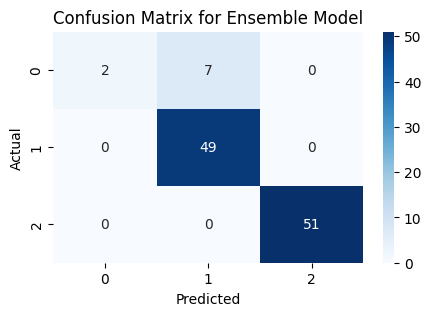

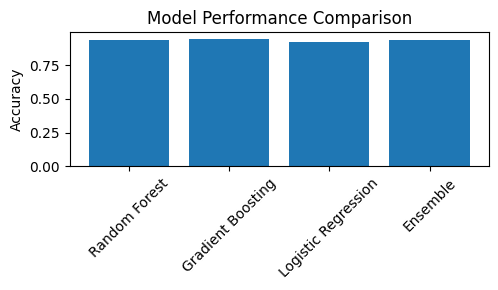

In [31]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use only the valid features that we know work well
valid_features = ['name', 'ingredients', 'flavor_profile', 'course', 'state', 'region']

# Initialize individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Create voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('lr', lr_model)
], voting='soft')

# Train the ensemble model using only selected features
X_train_selected = x_train[valid_features]
X_test_selected = x_test[valid_features]

voting_clf.fit(X_train_selected, y_train)

# Make predictions
y_pred_ensemble = voting_clf.predict(X_test_selected)

# Evaluate the ensemble model
print("Ensemble Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Create confusion matrix visualization
plt.figure(figsize=(5, 3))
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compare individual model performances
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Logistic Regression': lr_model,
    'Ensemble': voting_clf
}

# Calculate and display accuracies for all models
accuracies = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plot model comparison
plt.figure(figsize=(5, 3))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lasso Regression
We'll use Lasso regression for feature selection and model building.

Lasso Coefficients:
          Feature  Coefficient
3          course     0.234556
1     ingredients     0.117567
2  flavor_profile     0.094654
0            name     0.077949
4           state     0.049279
5          region     0.032250


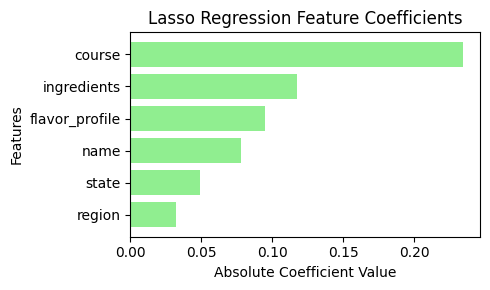

In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select only valid features for Lasso regression
valid_features = ['name', 'ingredients', 'flavor_profile', 'course', 'state', 'region']
X_filtered = x_train[valid_features]

# Scale the features
X_train_scaled = scaler.fit_transform(X_filtered)
X_test_scaled = scaler.transform(x_test[valid_features])

# Initialize and train Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

# Get feature coefficients
lasso_coef = pd.DataFrame({
    'Feature': valid_features,
    'Coefficient': np.abs(lasso.coef_)
}).sort_values(by='Coefficient', ascending=False)

print("Lasso Coefficients:")
print(lasso_coef)

# Plot feature coefficients
plt.figure(figsize=(5, 3))
plt.barh(lasso_coef['Feature'], lasso_coef['Coefficient'], color='lightgreen')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Lasso Regression Feature Coefficients')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()